In [70]:
#Importing Require Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Preprocessing of Dataset

In [71]:
df = pd.read_csv('./summer.csv')
#deleting redundant Column
del df['Discipline']
#Refactoring Athlete names in format "Firstname Lastname"
for i in range(len(df)):
  try:
    df['Athlete'][i] = df['Athlete'][i].split(",")[1]+" " +df['Athlete'][i].split(",")[0].lower()
  except:
    pass



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


# Summer Olympics Data Analysis Assignment

### 1. In how many cities Summer Olympics is held so far?

In [72]:
print("The Total Number of Cities where Olympics are Organized are: ",len(df['City'].unique()))

The Total Number of Cities where Olympics are Organized are:  22


### 2. Which sport is having most number of Gold Medals so far? (Top 5)

The Sports which are having most number of Gold Medals are : 
 Sport 	 	 No. of Gold Medals 

Aquatics  	 :  1421
Athletics  	 :  1215
Rowing  	 :  890
Gymnastics  	 :  820
Fencing  	 :  552


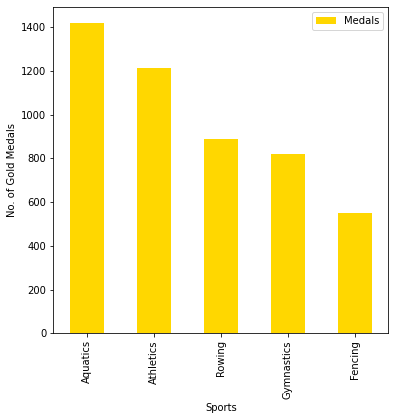

In [73]:
df_gold=df[df['Medal']=='Gold']
print("The Sports which are having most number of Gold Medals are : \n Sport \t \t No. of Gold Medals \n")

df2 =pd.DataFrame([[sorted(df_gold['Sport'].unique())[sport],len(pd.DataFrame(df_gold.groupby('Sport'))[1][sport])] for sport in range(len(df_gold['Sport'].unique()))],columns=['Sport','Medals']).sort_values(by='Medals',ascending=False).head()

for sport,medals in df2.values:
  print(sport," \t : ",medals)

df2.plot(x='Sport',y='Medals',kind='bar',figsize=(6,6),color='gold',xlabel='Sports',ylabel='No. of Gold Medals')
  

### 3. Which sport is having most number of medals so far? (Top 5)

The Sports which are having most number of Medals so far are : 
 Sport 	 	 No. of Medals 

Aquatics  	 :  4170
Athletics  	 :  3638
Rowing  	 :  2667
Gymnastics  	 :  2307
Fencing  	 :  1613


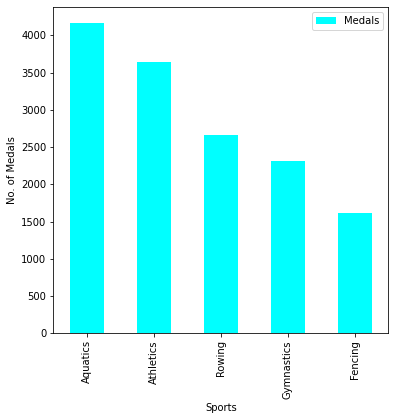

In [74]:
print('The Sports which are having most number of Medals so far are : \n Sport \t \t No. of Medals \n')
df3 = pd.DataFrame([[sorted(df['Sport'].unique())[medal],len(pd.DataFrame(df.groupby('Sport'))[1][medal])]  for medal in range(len(df['Sport'].unique()))],columns=['Sport','Medals']).sort_values(by='Medals',ascending=False).head()

for sport,medals in df3.values:
  print(sport," \t : ",medals)

df3.plot(x='Sport',y='Medals',kind='bar',figsize=(6,6),xlabel='Sports',ylabel="No. of Medals",color='cyan')

### 4. Which player has won most number of medals? (Top 5)

The following are the Top 5 who won most number of Medals : 
 Name 	 	 No. of Medals
 Michael phelps        	 :  22
 Larisa latynina       	 :  18
 Nikolay andrianov     	 :  15
 Takashi ono           	 :  13
 Edoardo mangiarotti   	 :  13


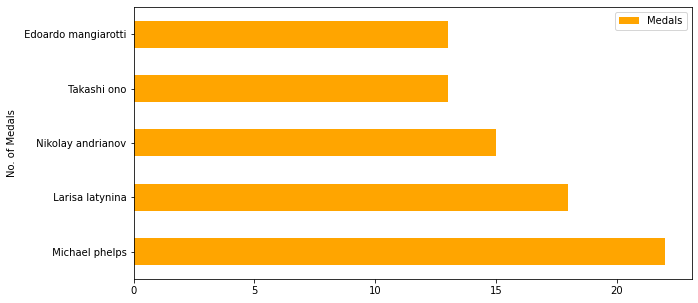

In [75]:
print("The following are the Top 5 who won most number of Medals : \n Name \t \t No. of Medals")

player_lst = df['Athlete'].unique()
player_data = []
for player in player_lst:
  player_data.append([player,len(df[df['Athlete']== player])])
df4= pd.DataFrame(player_data,columns=["Player","Medals"]).sort_values(by="Medals",ascending=False).head()
for player,medals in df4.values:
  print(f'{player:<20}',"  \t : ",medals)

df4.plot(y="Medals",x="Player",xlabel="No. of Medals",ylabel="Players",kind="barh",figsize=(10,5),color="orange")



### 5. Which player has won most number Gold Medals of medals? (Top 5)

The following are the Top 5 who won most number of Gold Medals : 
 Name 	 	 No. of Medals
 Michael phelps      	 :  18
 Mark spitz          	 :  9
 Larisa latynina     	 :  9
 Carl lewis          	 :  9
 Paavo nurmi         	 :  9


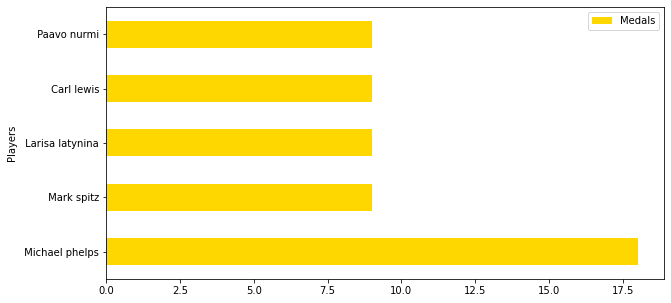

In [76]:
df_gold=df[df['Medal']=='Gold']
print("The following are the Top 5 who won most number of Gold Medals : \n Name \t \t No. of Medals")

player_lst = df_gold['Athlete'].unique()
player_data = []
for player in player_lst:
  player_data.append([player,len(df_gold[df_gold['Athlete']== player])])
df5= pd.DataFrame(player_data,columns=["Player","Medals"]).sort_values(by="Medals",ascending=False).head()
for player,medals in df5.values:
  print(f'{player:<20}',"\t : ",medals)

df5.plot(y="Medals",x="Player",ylabel="No. of gold Medals",xlabel="Players",kind="barh",figsize=(10,5),color="gold")




### 6. In which year India won first Gold Medal in Summer Olympics?

In [77]:
df6 = df[df["Country"]=="IND"]
first_gold = df6[df6["Medal"]=="Gold"]["Year"].min()
print("India won First Summer Olympics Gold Medal in the Year : ",first_gold)


India won First Summer Olympics Gold Medal in the Year :  1928


### 7. Which event is most popular in terms on number of players? (Top 5)

The Top 5 most popular events in terms on number of Players are : 
 Event Name 	 Popularity ( No. of Players )
Football               	 :  1497
Hockey                 	 :  1422
Team Competition       	 :  1147
Basketball             	 :  1012
Handball               	 :  973


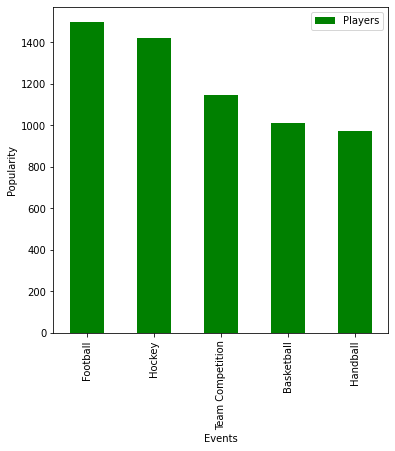

In [78]:
print("The Top 5 most popular events in terms on number of Players are : \n Event Name \t Popularity ( No. of Players )")
df7 = pd.DataFrame([ [sorted(df['Event'].unique())[event],len(pd.DataFrame(df.groupby('Event'))[1][event])] for event in range(len(df['Event'].unique()))],columns=["Event","Players"]).sort_values(by='Players',ascending=False).head()
for event,player in df7.values:
  print(f'{event:<20}',"  \t : ",player)
df7.plot(x="Event",y="Players",kind="bar",xlabel="Events",ylabel="Popularity",figsize=(6,6),color="green")


### 8. Which sport is having most female Gold Medalists? (Top 5)

The following are the Top 5 Sports which have most number of Female Gold Medalists : 
 Sport 	 	 No. of Female Gold Medalist
Aquatics             	 :  589
Athletics            	 :  389
Gymnastics           	 :  268
Rowing               	 :  217
Volleyball           	 :  166


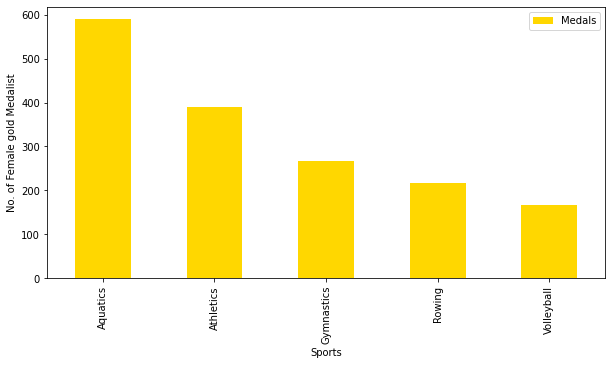

In [79]:
df_women = df[df["Gender"]=="Women"]
df_gold=df_women[df_women['Medal']=='Gold']

print("The following are the Top 5 Sports which have most number of Female Gold Medalists : \n Sport \t \t No. of Female Gold Medalist")
sport_lst = df_gold['Sport'].unique()
sport_data = []
for sport in sport_lst:
  sport_data.append([sport,len(df_gold[df_gold['Sport']== sport])])
df8= pd.DataFrame(sport_data,columns=["Sport","Medals"]).sort_values(by="Medals",ascending=False).head()
for sport,medals in df8.values:
  print(f'{sport:<20}',"\t : ",medals)

df8.plot(y="Medals",x="Sport",ylabel="No. of Female gold Medalist",xlabel="Sports",kind="bar",figsize=(10,5),color="gold")

